In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz


In [138]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris)
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)
print(f'Кількість елементів класів у тренувальній вибірці{np.bincount(y_train)}')
print(f'Кількість елементів класів у тестувальній вибірці{np.bincount(y_test)}')


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [139]:
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [140]:
y_pred = clf_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8888888888888888

In [142]:
# target = ['0','1','2']
# df= pd.DataFrame(np.array(y))
target= list(iris.target_names)


# print(np.unique(iris.target))
feature_name = list(iris.feature_names)
print(feature_name)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [143]:
dot_data = tree.export_graphviz(clf_model, feature_names=feature_name, class_names=target)
graph= graphviz.Source(dot_data)


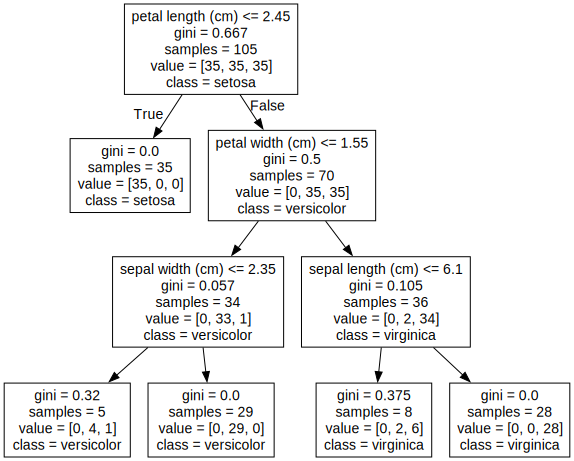

In [144]:
graph

In [145]:
importances= clf_model.feature_importances_
importances

array([0.01189263, 0.00521677, 0.5351682 , 0.44772241])

In [146]:
sorted_importances= pd.DataFrame({'feature':feature_name, 'importance': clf_model.feature_importances_}).sort_values('importance', ascending = False)
sorted_importances

,feature,importance
2,petal length (cm),0.535168
3,petal width (cm),0.447722
0,sepal length (cm),0.011893
1,sepal width (cm),0.005217
